> &nbsp;  
> The next two functions (`get_env_type` and `print_versions_and_GPU`) are used because the notebook was developed/run on different environments. They do not contribute to the actual exercise.  
> &nbsp;  

In [58]:
def get_env_type() -> str:
    '''
    Get the environment type where the code is running.

    Returns:
    - 'kaggle' if running on Kaggle
    - 'google.colab' if running on Google Colab
    - 'local' if running on local environment
    '''
    import os, sys
    if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
        return 'kaggle'
    elif 'google.colab' in sys.modules:
        if 'COLAB_TPU_ADDR' in os.environ:  # Google Colab w/ TPU
            # Connect to TPU
            import tensorflow
            tpu = tensorflow.distribute.cluster_resolver.TPUClusterResolver()
            tensorflow.config.experimental_connect_to_cluster(tpu)
            tensorflow.tpu.experimental.initialize_tpu_system(tpu)
        # Connect to Drive
        from google.colab import drive
        drive.mount('/content/drive')
        return 'google.colab'
    else:   # Running on local environment
        return 'local'

def print_versions_and_GPU() -> None:
    '''
    Prints version numbers for various modules and GPU information (if available).
    '''
    import sys, tensorflow, sklearn
    print(f'Python: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')
    print(f'TensorFlow: {tensorflow.__version__}')
    try:
        print(f'Keras: {tensorflow.keras.version()}')
    except:
        print(f'Keras: Unknown version')
    print(f'Scikit-learn: {sklearn.__version__}')
    gpus = tensorflow.config.list_physical_devices('GPU')
    if gpus is None:
        gpus = tensorflow.test.gpu_device_name()
    print(f'GPUs: {gpus if gpus else "None"}')

In [59]:
print_versions_and_GPU()

match get_env_type():
    case 'kaggle':
        raise ValueError('This notebook is not designed to run on Kaggle.')
    case 'google.colab':
        data_path = '/content/drive/MyDrive/data/tourism'
    case 'local':
        data_path = './data/tourism'
        max_epochs = 3
    case _:
        raise ValueError(f'Unknown environment type: {get_env_type()}')

print(f'\nRunning on {get_env_type()}')

Python: 3.11.5
TensorFlow: 2.16.1
Keras: 3.1.1
Scikit-learn: 1.2.2
GPUs: None

Running on local


In [107]:
import pandas as pd
import numpy as np
from IPython.display import Markdown

In [108]:
def mDisplay(what: str) -> None:
    display(Markdown(what))

# Data Science

1. Import all the datasets and perform preliminary inspections, such as:
   1. Check for missing values and duplicates
   2. Remove any anomalies found in the data


In [232]:
def check_quality(df: pd.DataFrame, name: str) -> None:
    '''
    Check the 'quality' of a DataFrame.
    '''
    mDisplay(f"> # {name} Information:")
    display(df)
    df.info()
    display(df.describe(include='all'))
    mDisplay("> ### Missing Values:")
    display(df.isnull().sum())
    mDisplay("> ### Empty Strings:")
    display(df.eq('').sum())
    mDisplay(f"> ### Duplicated rows: {df.duplicated().sum()}")

In [233]:
df_destinations = pd.read_excel(f'{data_path}/tourism_with_id.xlsx')

check_quality(df_destinations, 'Destinations')


> # Destinations Information:

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437,437,437,437,437.000000,437.000000,205.000000,437,437.000000,437.000000,0.0,437.000000
unique,NaN,437,437,6,5,NaN,NaN,NaN,437,NaN,NaN,NaN,NaN
top,NaN,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Taman Hiburan,Yogyakarta,NaN,NaN,NaN,"{'lat': -6.1753924, 'lng': 106.8271528}",NaN,NaN,NaN,NaN
freq,NaN,1,1,135,126,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
mean,219.000000,NaN,NaN,NaN,NaN,24652.173913,4.442792,82.609756,NaN,-7.095438,109.160142,NaN,219.000000
std,126.295289,NaN,NaN,NaN,NaN,66446.374709,0.208587,52.872339,NaN,0.727241,1.962848,NaN,126.295289
min,1.000000,NaN,NaN,NaN,NaN,0.000000,3.400000,10.000000,NaN,-8.197894,103.931398,NaN,1.000000
25%,110.000000,NaN,NaN,NaN,NaN,0.000000,4.300000,45.000000,NaN,-7.749590,107.578369,NaN,110.000000
50%,219.000000,NaN,NaN,NaN,NaN,5000.000000,4.500000,60.000000,NaN,-7.020524,110.237468,NaN,219.000000
75%,328.000000,NaN,NaN,NaN,NaN,20000.000000,4.600000,120.000000,NaN,-6.829411,110.431869,NaN,328.000000


> ### Missing Values:

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

> ### Empty Strings:

Place_Id        0
Place_Name      0
Description     0
Category        0
City            0
Price           0
Rating          0
Time_Minutes    0
Coordinate      0
Lat             0
Long            0
Unnamed: 11     0
Unnamed: 12     0
dtype: int64

> ### Duplicated rows: 0

> &nbsp;  
> Destinations - cleaning up:  
> * `Unnamed: 12`: duplicate of "Place_Id"
> * `Unnamed: 11`: all `NaN`
> * `Coordinate`: we've got `Lat` and `Long` already
> * `Time_Minutes`: too many `NaN`s  
> &nbsp;  

In [234]:
df_destinations.drop(columns=['Unnamed: 12', 'Unnamed: 11', 'Coordinate', 'Time_Minutes'], inplace=True)

check_quality(df_destinations, "Destinations (after cleanup)")

> # Destinations (after cleanup) Information:

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,-6.124190,106.839134
...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,-7.433859,112.719906
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,-7.291347,112.739822
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,-7.275296,112.754938
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,-7.294330,112.761753


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Lat          437 non-null    float64
 8   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 30.9+ KB


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long
count,437.000000,437,437,437,437,437.000000,437.000000,437.000000,437.000000
unique,NaN,437,437,6,5,NaN,NaN,NaN,NaN
top,NaN,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Taman Hiburan,Yogyakarta,NaN,NaN,NaN,NaN
freq,NaN,1,1,135,126,NaN,NaN,NaN,NaN
mean,219.000000,NaN,NaN,NaN,NaN,24652.173913,4.442792,-7.095438,109.160142
std,126.295289,NaN,NaN,NaN,NaN,66446.374709,0.208587,0.727241,1.962848
min,1.000000,NaN,NaN,NaN,NaN,0.000000,3.400000,-8.197894,103.931398
25%,110.000000,NaN,NaN,NaN,NaN,0.000000,4.300000,-7.749590,107.578369
50%,219.000000,NaN,NaN,NaN,NaN,5000.000000,4.500000,-7.020524,110.237468
75%,328.000000,NaN,NaN,NaN,NaN,20000.000000,4.600000,-6.829411,110.431869


> ### Missing Values:

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
Lat            0
Long           0
dtype: int64

> ### Empty Strings:

Place_Id       0
Place_Name     0
Description    0
Category       0
City           0
Price          0
Rating         0
Lat            0
Long           0
dtype: int64

> ### Duplicated rows: 0

In [235]:
df_ratings = pd.read_csv(f'{data_path}/tourism_rating.csv')

check_quality(df_ratings, "User Ratings")


> # User Ratings Information:

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


> ### Missing Values:

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

> ### Empty Strings:

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

> ### Duplicated rows: 79

> &nbsp;  
> Ratings - Additional checks:
> * There are 79 'duplicated rows'.  Let's check how often a tourist rates the same place differently.  If the number is higher than 79, it would indicate the data comprises every instance where a tourist has rated a place.  In this scenario, some tourists may rate a given place differently on 2 different visits.  Some repeat tourists would be more consistent in their rating, which could cause the 79 'duplicated' rows.
> &nbsp;

In [238]:
# create a df with all combinations of 'User_Id' and 'Place_id' values present in df_ratings
tourist_place = df_ratings.groupby(['User_Id', 'Place_Id']).size().reset_index(name='count')
tourist_place = tourist_place[tourist_place['count'] > 1]
mDisplay(f"> # Tourists having rated a place more than once")
tourist_place

> # Tourists having rated a place more than once

,User_Id,Place_Id,count
22,1,328,2
42,2,208,2
55,2,437,2
73,3,202,2
127,5,301,2
...,...,...,...
9502,297,418,2
9522,298,240,2
9560,299,290,2
9569,299,407,2


> &nbsp;  
> There are 395 rows with same place/same tourist as some other ID: this indicates that each visit creates a new row in the data.  We won't eliminate any such row, then.  
> &nbsp;  

In [239]:
df_tourists = pd.read_csv(f'{data_path}/user.csv')

check_quality(df_tourists, "Tourist (User)")

> # Tourist (User) Information:

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


,User_Id,Location,Age
count,300.000000,300,300.000000
unique,NaN,28,NaN
top,NaN,"Bekasi, Jawa Barat",NaN
freq,NaN,39,NaN
mean,150.500000,NaN,28.700000
std,86.746758,NaN,6.393716
min,1.000000,NaN,18.000000
25%,75.750000,NaN,24.000000
50%,150.500000,NaN,29.000000
75%,225.250000,NaN,34.000000


> ### Missing Values:

User_Id     0
Location    0
Age         0
dtype: int64

> ### Empty Strings:

User_Id     0
Location    0
Age         0
dtype: int64

> ### Duplicated rows: 0

> &nbsp;  
> Tourists: nothing to clean up  
> &nbsp;  

2. To understand the tourism highlights better, we should explore the data in depth.
   1. Explore the user group that provides the tourism ratings by:
      * Analyzing the age distribution of users visiting the places and rating them 
      * Identifying the places where most of these users (tourists) are coming from

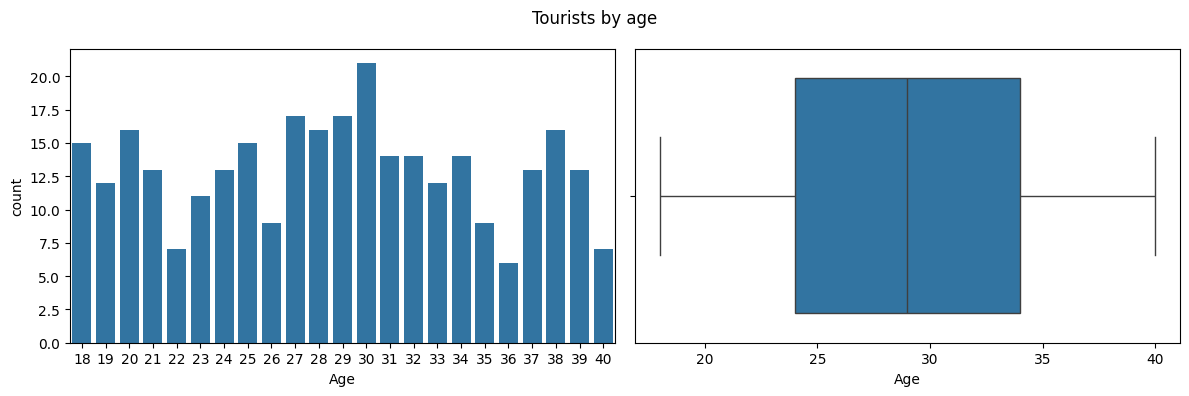

In [67]:
# Create a bar chart of the number of tourists by age, and a boxplot of the number of tourists by age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))
plt.suptitle('Tourists by age')
plt.subplot(1, 2, 1)
sns.countplot(x='Age', data=df_tourists)
plt.subplot(1, 2, 2)
sns.boxplot(x='Age', data=df_tourists)
plt.tight_layout()
plt.show()

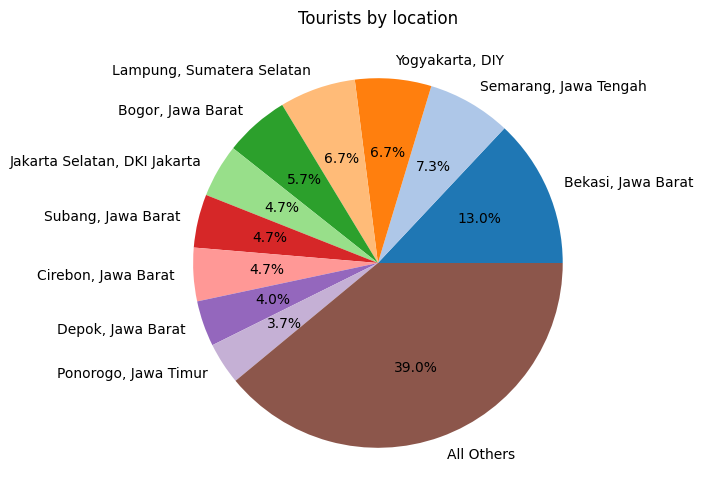

In [242]:
# Create a pie chart of the top 10 places of origin of the tourists and 1 "other" category that counts the rest.
from matplotlib import cm

location_counts = df_tourists['Location'].value_counts()
top_locations = location_counts.head(10)
other_origins = location_counts[10:].sum()
top_locations['All Others'] = other_origins
plt.figure(figsize=(6, 6))
plt.pie(top_locations, 
        labels=top_locations.index,
        autopct='%1.1f%%', 
        colors=cm.tab20.colors)
plt.title('Tourists by location')
plt.show()

3. Next, let's explore the locations and categories of tourist spots.
   1. What are the different categories of tourist spots?


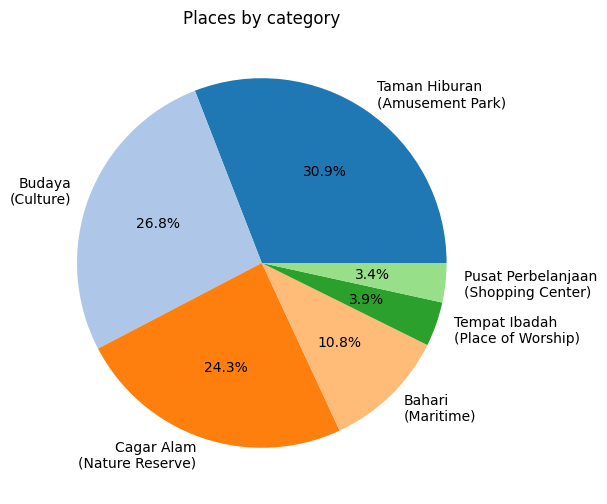

In [243]:
# Count the instances of ratings for each category
category_counts = df_destinations['Category'].value_counts()

# Translations of the categories (from translate.google.com)
xlat = {'Taman Hiburan': 'Amusement Park',
        'Budaya': 'Culture',
        'Cagar Alam': 'Nature Reserve',
        'Bahari': 'Maritime',
        'Tempat Ibadah': 'Place of Worship',
        'Pusat Perbelanjaan': 'Shopping Center'}
xlat = {k: f"{k}\n({v})" for k, v in xlat.items()}

category_counts = category_counts.rename(index=xlat)
category_counts

# Create a pie chart of the number of places by category
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=cm.tab20.colors)
plt.title('Places by category')
plt.show()

# For each location in df_destinations, count the number

3. &nbsp;  
   2. What kind of tourism each location is most famous or suitable for?



In [70]:
# For each city in df_destination, calculate the total number of attractions by category
city_cats = df_destinations.groupby('City')['Category'].value_counts().unstack().fillna(0)
city_cats = city_cats.rename(columns=xlat)

# For each city, identify the most popular category (and the corresponding percentage)
most_popular = pd.DataFrame(city_cats.idxmax(axis=1), columns=['Most Popular Category'])
most_popular['Most Popular Category'] = most_popular['Most Popular Category'].str.replace('\n', ' ')
most_popular['Percentage'] = (city_cats.max(axis=1) / city_cats.sum(axis=1)).apply(lambda x: f'{x:.1%}')

display(most_popular)


,Most Popular Category,Percentage
City,,
Bandung,Cagar Alam (Nature Reserve),43.5%
Jakarta,Budaya (Culture),38.1%
Semarang,Cagar Alam (Nature Reserve),35.1%
Surabaya,Budaya (Culture),39.1%
Yogyakarta,Taman Hiburan (Amusement Park),28.6%


3. &nbsp;  
   3. Which city would be best for a nature enthusiast to visit?


In [71]:
pd.DataFrame(df_destinations[df_destinations['Category'].str.startswith('Cagar Alam')]['City'].value_counts()).rename(columns={'count': 'Nature Preserves'}).head(1)

,Nature Preserves
City,
Bandung,54


4. To better understand tourism, we need to create a combined data with places and their user ratings.


In [119]:
# Merge the df_destinations and df_ratings DataFrames, matching on the 'Place_Id' column
df = pd.merge(df_ratings, df_destinations, on='Place_Id', how='left')
df = pd.merge(df, df_tourists, on='User_Id', how='left')
df.drop(columns=['Place_Id'], inplace=True) # We don't need it anymore as the Place_Name should be unique enough.

df

,User_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Lat,Long,Location,Age
0,1,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,4.6,-7.770542,110.489416,"Semarang, Jawa Tengah",20
1,1,2,Pantai Marina,Pantai Marina (bahasa Jawa: Í¶•Í¶±Í¶∂Í¶±Í¶∂Í¶Ç...,Bahari,Semarang,3000,4.1,-6.948877,110.389329,"Semarang, Jawa Tengah",20
2,1,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,-6.124190,106.839134,"Semarang, Jawa Tengah",20
3,1,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Budaya,Semarang,10000,4.5,-7.264599,110.404602,"Semarang, Jawa Tengah",20
4,1,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Budaya,Yogyakarta,0,4.0,-7.792190,110.362151,"Semarang, Jawa Tengah",20
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,300,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Taman Hiburan,Surabaya,35000,4.1,-7.247796,112.799824,"Ponorogo, Jawa Timur",26
9996,300,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Budaya,Jakarta,2000,4.7,-6.204630,106.836532,"Ponorogo, Jawa Timur",26
9997,300,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Cagar Alam,Bandung,25000,4.3,-6.829411,107.687467,"Ponorogo, Jawa Timur",26
9998,300,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Tempat Ibadah,Bandung,0,4.8,-6.925963,107.635428,"Ponorogo, Jawa Timur",26


4. &nbsp;  
   1. Use this data to figure out the spots that are most loved by the tourists. Also, which city has the most loved tourist spots?  

> &nbsp;  
> We'll assume 5 'rating' levels: Loved, Favorable, Neutral, Unfavorable, Disliked  
> &nbsp;

In [120]:
# For each place in df, calculate the average rating
average_ratings = pd.DataFrame(df.groupby('Place_Name')['Place_Ratings'].mean().sort_values(ascending=False))
average_ratings.columns = ['Average Rating']

# Derive rating levels based on the range of available ratings
min_rating = np.round(average_ratings['Average Rating'].min(),1)
max_rating = np.round(average_ratings['Average Rating'].max(),1)
rating_width = (max_rating - min_rating) / 5
rating_levels = {
    k: (np.round(v,1), np.round(v+rating_width,1)) 
        for v,k in zip(
            np.arange(min_rating, max_rating + rating_width, rating_width), 
            ["Disliked", "Unfavorable", "Neutral", "Favorable", "Loved"])}
average_ratings['Rating Level'] = average_ratings['Average Rating'].apply(
    lambda x: next(k for k,v in rating_levels.items() if v[0] <= x <= v[1]))
mDisplay("> ## Top 10 most loved places:  ")
display(average_ratings.head(10))


average_ratings = average_ratings.merge(df_destinations, on='Place_Name', how='left')
average_ratings.drop(columns=['Place_Id', 'Description'], inplace=True)
loved_by_city = pd.DataFrame(average_ratings[average_ratings['Rating Level'] == 'Loved'].groupby('City')['Place_Name'].count().sort_values(ascending=False))
loved_by_city.columns = ['Number of Loved Places']
mDisplay("> ## City with the most loved places:  ")
display(loved_by_city.head(1))


> ## Top 10 most loved places:  

,Average Rating,Rating Level
Place_Name,,
Keraton Surabaya,3.967742,Loved
Puncak Gunung Api Purba - Nglanggeran,3.882353,Loved
Kampung Cina,3.842105,Loved
Teras Cikapundung BBWS,3.789474,Loved
Monumen Yogya Kembali,3.772727,Loved
Bukit Jamur,3.766667,Loved
Bukit Bintang Yogyakarta,3.764706,Loved
Monumen Nasional,3.722222,Loved
Glamping Lakeside Rancabali,3.714286,Loved


> ## City with the most loved places:  

,Number of Loved Places
City,
Bandung,7


4. &nbsp;  
   2. Indonesia provides a wide range of tourist spots ranging from historical and cultural beauties to advanced amusement parks. Among these, which category of places are users liking the most?


In [121]:
# For each category in df, calculate the average rating
average_ratings_by_category = pd.DataFrame(df.groupby('Category')['Place_Ratings'].mean().sort_values(ascending=False))
average_ratings_by_category.columns = ['Average Rating']

average_ratings_by_category['Rating Level'] = average_ratings_by_category['Average Rating'].apply(
    lambda x: next(k for k,v in rating_levels.items() if v[0] <= x <= v[1]))

mDisplay("> ## Average ratings by category:  ")
display(average_ratings_by_category)

> ## Average ratings by category:  

,Average Rating,Rating Level
Category,,
Taman Hiburan,3.117917,Neutral
Cagar Alam,3.080745,Neutral
Tempat Ibadah,3.080519,Neutral
Budaya,3.034663,Neutral
Bahari,3.006487,Neutral
Pusat Perbelanjaan,2.945455,Neutral


5. Build a recommender model for the system
   1. Use the above data to develop a collaborative filtering model for recommendation and use that to recommend other places to visit using the current tourist location(place name)

In [168]:
# Compute how many ratings each user has given
ratings_by_each_user = df.groupby('User_Id')['Place_Ratings'].count().sort_values(ascending=False)
min_ratings_by_user = ratings_by_each_user.min()
max_ratings_by_user = ratings_by_each_user.max()
median_ratings_by_user = ratings_by_each_user.median()
mDisplay(f"> &nbsp;  \n> Each user has submitted between {min_ratings_by_user} and {max_ratings_by_user} ratings, with a median of {median_ratings_by_user:.0f}.  \n> &nbsp;  ")
if (median_ratings_by_user > 30):
    mDisplay("> &nbsp;  \n> This should be sufficient to warrant Z-score normalization.  \n> &nbsp;  ")

> &nbsp;  
> Each user has submitted between 21 and 53 ratings, with a median of 33.  
> &nbsp;  

> &nbsp;  
> This should be sufficient to warrant Z-score normalization.  
> &nbsp;  

In [193]:
# Build a pivot table with the ratings given by each user to each place, and normalize the ratings 
# using Z-score normalization.  Also, track the mean and std dev for each user for later
# de-normalization to display results.
scores_mtx = df.pivot_table(index='User_Id', columns='Place_Name', values='Place_Ratings')
normalization_info_by_user = pd.DataFrame(index=scores_mtx.index)
normalization_info_by_user['Mean'] = scores_mtx.mean(axis=1)
normalization_info_by_user['Std'] = scores_mtx.std(axis=1)
#display(normalization_info_by_user)
scores_mtx = scores_mtx.apply(lambda x: (x - x.mean()) / x.std(), axis=1)
#scores_mtx

In [171]:
# Build a correlation matrix of the ratings given by each user to each place
correlation_mtx = scores_mtx.T.corr()
#correlation_mtx

In [226]:
def get_user_ratings(user_id: int):
    '''
    Get the ratings given by a user.
    '''
    user_ratings = scores_mtx.loc[user_id].dropna()
    user_ratings = pd.DataFrame(user_ratings)
    user_ratings.columns = ['Normalized Rating']
    user_ratings = user_ratings.merge(df_destinations, on='Place_Name', how='left')
    (mean, std) = normalization_info_by_user.loc[user_id]
    user_ratings['User Rating'] = user_ratings['Normalized Rating'].apply(lambda x: f'{x*std + mean:.2f}')
    user_ratings.drop(columns=['Place_Id','Rating','Normalized Rating'], inplace=True)
    user_ratings.sort_values('User Rating', ascending=False, inplace=True)
    return user_ratings

def recommend(target_user_id: int):
    '''
    Recommend places to a user based on the ratings given by other users.
    '''
    # Get the ratings given by the target user
    target_user_ratings = scores_mtx.loc[target_user_id].dropna()
    # Get the correlation between the target user and all other users
    target_user_correlations = \
        correlation_mtx[target_user_id].dropna().sort_values(ascending=False)
    # Get the users who have rated the same places as the target user and remove the target user
    # from the list
    similar_users = correlation_mtx[target_user_id].dropna()
    similar_users.drop(index=target_user_id, inplace=True)
    similar_users = similar_users.sort_values(ascending=False)
    # Get the ratings given by the similar users to the places rated by the target user
    similar_users_ratings = \
        scores_mtx.loc[similar_users.index].dropna(axis=1, how='all')
    #display(similar_users_ratings)

    # Calculate the predicted ratings for the target user based on the ratings given by the similar 
    # users. The predicted rating is the average rating given by the similar users, weighted by the
    # correlation between the target user and the similar users
    predicted_ratings = similar_users_ratings.apply(
        lambda x: x.mean() + \
            (target_user_ratings - x).multiply(target_user_correlations).sum() / \
                target_user_correlations.sum(), axis=0)
    predicted_ratings = predicted_ratings.sort_values(ascending=False)
    #display(predicted_ratings)
    
    # Get the places that the target user has not rated yet
    #unrated_places = predicted_ratings[predicted_ratings.isnull()].index
    unrated_places = \
        scores_mtx.loc[target_user_id][scores_mtx.loc[target_user_id].isnull()].index
    #display(pd.DataFrame(unrated_places))

    # Sort the places by the predicted ratings and de-normalize the ratings
    retval = pd.DataFrame(predicted_ratings[unrated_places].sort_values(ascending=False))
    retval.columns = ['Normalized Predicted Rating']
    (mean, std) = normalization_info_by_user.loc[target_user_id]
    retval['Predicted Rating'] = retval['Normalized Predicted Rating'].apply(lambda x: f'{x*std + mean:.2f}')

    # merge in info about the suggested destinations
    retval = retval.merge(df_destinations, on='Place_Name', how='left')
    retval.drop(columns=['Place_Id', 'Normalized Predicted Rating'], inplace=True)

    return retval

In [227]:
# For 5 random users, show what their top 10 ratings were and what their top 10 recommended places are
for user_id in np.random.choice(scores_mtx.index, 5):
    mDisplay(f"> # User {user_id}  ")
    mDisplay(f"> ### Top 10 places rated by User {user_id}:  ")
    display(get_user_ratings(user_id).head(10))
    mDisplay(f"> ### Top 10 recommended places for User {user_id}:  ")
    display(recommend(user_id).head(10))

> # User 67  

> ### Top 10 places rated by User 67:  

,Place_Name,Description,Category,City,Price,Lat,Long,User Rating
0,Air Terjun Semirang,Terletak di lereng Gunung Ungaran bagian utara...,Cagar Alam,Semarang,9000,-7.166297,110.381068,5.00
30,Taman Balai Kota Bandung,Taman Balai Kota Bandung merupakan sebuah tama...,Taman Hiburan,Bandung,0,-6.912966,107.609603,5.00
26,Sanghyang Heuleut,Danau yang satu ini memiliki air jernih bernua...,Cagar Alam,Bandung,10000,-6.876513,107.342218,5.00
5,Bukit Wisata Pulepayung,Pule Payung Yogyakarta. Sebuah objek wisata po...,Cagar Alam,Yogyakarta,10000,-7.800111,110.123895,5.00
6,De Mata Museum Jogja,Museum De Mata merupakan salah satu museum yan...,Budaya,Yogyakarta,50000,-7.816316,110.387144,5.00
23,Perkebunan Teh Malabar,Salah satu perkebunan teh yang cukup terkenal ...,Cagar Alam,Bandung,5000,-7.227446,107.605080,5.00
22,Pasar Kebon Empring Bintaran,Pasar Kebon Empring merupakan salah satu objek...,Pusat Perbelanjaan,Yogyakarta,0,-7.836321,110.457581,5.00
15,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,-7.256755,112.794220,5.00
12,Hutan Wisata Tinjomoyo Semarang,Awalnya taman wisata hutan Tinjomoyo Semarang ...,Cagar Alam,Semarang,3000,-7.029684,110.399961,4.00
29,Tafso Barn,Nama Punclut mungkin sudah cukup akrab di teli...,Cagar Alam,Bandung,0,-6.842645,107.622841,4.00


> ### Top 10 recommended places for User 67:  

,Place_Name,Predicted Rating,Description,Category,City,Price,Rating,Lat,Long
0,Puncak Gunung Api Purba - Nglanggeran,3.99,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,-7.841253,110.543056
1,Monumen Selamat Datang,3.93,Monumen Selamat Datang adalah sebuah monumen y...,Budaya,Jakarta,0,4.7,-6.194998,106.823050
2,Monumen Yogya Kembali,3.87,Museum Monumen Yogya Kembali (bahasa Jawa: Í¶©...,Budaya,Yogyakarta,15000,4.5,-7.749590,110.369607
3,Teras Cikapundung BBWS,3.87,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,-6.884420,107.606834
4,Bukit Bintang Yogyakarta,3.83,Bukit Bintang merupakan salah satu lokasi nong...,Taman Hiburan,Yogyakarta,25000,4.5,-7.845841,110.479846
5,Curug Batu Templek,3.70,Curug Batu Templek Bandung adalah sebuah wisat...,Cagar Alam,Bandung,5000,4.1,-6.874363,107.684402
6,Pantai Ngrawe (Mesra),3.70,Kabupaten Gunungkidul jadi salah satu wilayah ...,Bahari,Yogyakarta,10000,4.5,-8.133339,110.553741
7,Watu Lumbung,3.68,Letak Kampung Edukasi Watu Lumbung yang berada...,Cagar Alam,Yogyakarta,5000,4.3,-7.992438,110.317778
8,Situs Warungboto,3.66,Situs Warungboto atau Pesanggrahan Rejawinangu...,Taman Hiburan,Yogyakarta,0,4.4,-7.810269,110.393151
9,Sumur Gumuling,3.64,Sumur Gumuling adalah salah satu tempat untuk ...,Taman Hiburan,Yogyakarta,7000,4.5,-7.808791,110.359183


> # User 230  

> ### Top 10 places rated by User 230:  

,Place_Name,Description,Category,City,Price,Lat,Long,User Rating
19,Monumen Kapal Selam,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Budaya,Surabaya,15000,-7.265430,112.750305,5.00
7,Desa Wisata Pulesari,Desa Wisata Pulesari semakin menambah deretan ...,Taman Hiburan,Yogyakarta,0,-7.625881,110.371698,5.00
28,Pasar Kebon Empring Bintaran,Pasar Kebon Empring merupakan salah satu objek...,Pusat Perbelanjaan,Yogyakarta,0,-7.836321,110.457581,5.00
31,Sunrise Point Cukul,Sunrise Point Cukul merupakan salah satu tempa...,Cagar Alam,Bandung,10000,-7.233689,107.534293,5.00
16,La Kana Chapel,La Kana Chapel menawarkan konsep baru standing...,Taman Hiburan,Semarang,35000,-7.215692,110.364939,5.00
8,Freedom Library,Freedom Library adalah perpustakaan buku yang ...,Budaya,Jakarta,0,-6.202248,106.845197,5.00
34,Taman Srigunting,Merupakan salah satu landmark di Kawasan Kota ...,Taman Hiburan,Semarang,0,-6.968173,110.427826,5.00
36,Trans Studio Bandung,Trans Studio Bandung adalah kawasan wisata ter...,Taman Hiburan,Bandung,280000,-6.925094,107.636494,5.00
26,Pantai Nglambor,Pantai Nglambor adalah sebuah pantai eksotis y...,Bahari,Yogyakarta,10000,-8.182703,110.679240,5.00
10,Geoforest Watu Payung Turunan,Bagi para pemburu keindahan matahari terbit ya...,Cagar Alam,Yogyakarta,0,-7.974294,110.436436,4.00


> ### Top 10 recommended places for User 230:  

,Place_Name,Predicted Rating,Description,Category,City,Price,Rating,Lat,Long
0,Teras Cikapundung BBWS,4.41,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,-6.884420,107.606834
1,Taman Pelangi,4.36,Kalau pelangi biasanya ada di siang hari pasca...,Taman Hiburan,Surabaya,0,4.5,-7.327560,112.731224
2,Kampung Cina,4.26,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,-6.365136,106.761798
3,Sumur Gumuling,4.12,Sumur Gumuling adalah salah satu tempat untuk ...,Taman Hiburan,Yogyakarta,7000,4.5,-7.808791,110.359183
4,Bukit Bintang Yogyakarta,4.00,Bukit Bintang merupakan salah satu lokasi nong...,Taman Hiburan,Yogyakarta,25000,4.5,-7.845841,110.479846
5,Monumen Yogya Kembali,3.96,Museum Monumen Yogya Kembali (bahasa Jawa: Í¶©...,Budaya,Yogyakarta,15000,4.5,-7.749590,110.369607
6,Pantai Nguluran,3.95,Di pantai Nguluran anda hanya bisa melihat ham...,Bahari,Yogyakarta,10000,4.1,-8.106006,110.461866
7,Museum Bank Indonesia,3.94,Museum Bank Indonesia adalah sebuah museum di ...,Budaya,Jakarta,2000,4.7,-6.137127,106.813005
8,Puncak Gunung Api Purba - Nglanggeran,3.88,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,-7.841253,110.543056
9,Keraton Surabaya,3.88,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,-7.256755,112.794220


> # User 34  

> ### Top 10 places rated by User 34:  

,Place_Name,Description,Category,City,Price,Lat,Long,User Rating
5,Jembatan Kota Intan,Jembatan Kota Intan adalah jembatan tertua di ...,Budaya,Jakarta,0,-6.131457,106.810617,5.00
16,Pulau Semak Daun,Pulau Semak Daun merupakan salah satu pulau ya...,Bahari,Jakarta,40000,-5.729672,106.571416,5.00
10,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,-7.433859,112.719906,4.00
3,Desa Wisata Pulesari,Desa Wisata Pulesari semakin menambah deretan ...,Taman Hiburan,Yogyakarta,0,-7.625881,110.371698,4.00
18,Taman Kasmaran,Taman Kasmaran terletak di sebelah kiri Pasar ...,Taman Hiburan,Semarang,3000,-6.990940,110.406593,4.00
17,Stone Garden Citatah,"Stone Garden, adalah sebutan nama untuk hampa...",Taman Hiburan,Bandung,30000,-6.828153,107.435018,4.00
7,Kiara Artha Park,Kiara Artha Park merupakan sebuah kawasan terp...,Taman Hiburan,Bandung,15000,-6.915946,107.642146,4.00
9,Museum Gunung Merapi,Museum Gunung Merapi (bahasa Jawa: ÍßãÍ¶©Í¶∏Í¶...,Budaya,Yogyakarta,10000,-7.615927,110.424333,4.00
11,Museum Nasional,Museum Nasional Republik Indonesia atau Museum...,Budaya,Jakarta,5000,-6.176402,106.821590,4.00
13,Pantai Samas,Pantai Samas (bahasa Jawa: Í¶•Í¶±Í¶∂Í¶±Í¶∂Í¶Ç‚...,Bahari,Yogyakarta,4000,-8.004554,110.270376,3.50


> ### Top 10 recommended places for User 34:  

,Place_Name,Predicted Rating,Description,Category,City,Price,Rating,Lat,Long
0,Watu Goyang,4.40,Watu Goyang ini berasal dari Bahasa Jawa yang ...,Budaya,Yogyakarta,2500,4.4,-7.927409,110.412059
1,Monumen Nasional,4.37,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,-6.175392,106.827153
2,Puncak Gunung Api Purba - Nglanggeran,4.35,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,-7.841253,110.543056
3,Obyek Wisata Goa Kreo,4.32,Goa Kreo Semarang yang berada di ibukota Jawa ...,Cagar Alam,Semarang,5500,4.3,-7.037211,110.347616
4,Museum Ullen Sentalu,4.26,"Museum Ullen Sentalu, (bahasa Jawa: Í¶©Í¶∏Í¶±Í...",Budaya,Yogyakarta,100000,4.7,-7.597866,110.423396
5,Puspa Iptek Sundial,4.22,Puspa Iptek Sundial adalah wahana pendidikan y...,Taman Hiburan,Bandung,25000,4.4,-6.852208,107.493882
6,Monumen Perjuangan Rakyat Jawa Barat,4.20,Monumen Perjuangan Rakyat Jawa Barat (Monju) a...,Budaya,Bandung,0,4.5,-6.893433,107.618551
7,Jogja Exotarium,4.14,"Di Yogyakarta, tepatnya di Sleman, ada satu te...",Taman Hiburan,Yogyakarta,20000,4.4,-7.728036,110.359171
8,Bukit Jamur,4.11,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,-7.195110,107.431281
9,Keraton Surabaya,4.09,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,-7.256755,112.794220


> # User 49  

> ### Top 10 places rated by User 49:  

,Place_Name,Description,Category,City,Price,Lat,Long,User Rating
43,Wisata Mangrove Tapak,Wisata hutan mangrove Semarang hampir tak pern...,Cagar Alam,Semarang,5000,-6.968562,110.345970,5.00
6,Goa Pindul,Gua Pindul adalah objek wisata berupa gua yang...,Cagar Alam,Yogyakarta,40000,-7.933972,110.651966,5.00
26,Plaza Indonesia,Plaza Indonesia diresmikan pada awal tahun 199...,Pusat Perbelanjaan,Jakarta,0,-6.193926,106.822216,5.00
28,Sam Poo Kong Temple,Sam Poo Kong (Hanzi: ; Pinyin: SƒÅnb«éo D√≤ng)...,Budaya,Semarang,35000,-6.996237,110.398122,5.00
31,Sunrise Point Cukul,Sunrise Point Cukul merupakan salah satu tempa...,Cagar Alam,Bandung,10000,-7.233689,107.534293,5.00
36,Taman Menteng,Taman Menteng adalah sebuah taman yang berloka...,Taman Hiburan,Jakarta,0,-6.196409,106.829311,5.00
33,Taman Balai Kota Bandung,Taman Balai Kota Bandung merupakan sebuah tama...,Taman Hiburan,Bandung,0,-6.912966,107.609603,5.00
5,Desa Wisata Gamplong,Desa Wisata Gamplong adalah desa wisata keraji...,Taman Hiburan,Yogyakarta,10000,-7.805523,110.237468,5.00
3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:Í¶...,Budaya,Yogyakarta,75000,-7.770542,110.489416,5.00
39,Water Park Bandung Indah,Bandung Indah Waterpark merupakan salah satu k...,Taman Hiburan,Bandung,50000,-6.980581,107.585657,4.00


> ### Top 10 recommended places for User 49:  

,Place_Name,Predicted Rating,Description,Category,City,Price,Rating,Lat,Long
0,Keraton Surabaya,4.14,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,-7.256755,112.794220
1,Sanghyang Heuleut,3.93,Danau yang satu ini memiliki air jernih bernua...,Cagar Alam,Bandung,10000,4.4,-6.876513,107.342218
2,Sumur Gumuling,3.93,Sumur Gumuling adalah salah satu tempat untuk ...,Taman Hiburan,Yogyakarta,7000,4.5,-7.808791,110.359183
3,Monumen Yogya Kembali,3.92,Museum Monumen Yogya Kembali (bahasa Jawa: Í¶©...,Budaya,Yogyakarta,15000,4.5,-7.749590,110.369607
4,Monumen Selamat Datang,3.86,Monumen Selamat Datang adalah sebuah monumen y...,Budaya,Jakarta,0,4.7,-6.194998,106.823050
5,Obyek Wisata Goa Kreo,3.84,Goa Kreo Semarang yang berada di ibukota Jawa ...,Cagar Alam,Semarang,5500,4.3,-7.037211,110.347616
6,Curug Batu Templek,3.82,Curug Batu Templek Bandung adalah sebuah wisat...,Cagar Alam,Bandung,5000,4.1,-6.874363,107.684402
7,Bukit Jamur,3.80,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,0,4.2,-7.195110,107.431281
8,Teras Cikapundung BBWS,3.79,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,-6.884420,107.606834
9,Puncak Gunung Api Purba - Nglanggeran,3.76,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar Alam,Yogyakarta,10000,4.7,-7.841253,110.543056


> # User 168  

> ### Top 10 places rated by User 168:  

,Place_Name,Description,Category,City,Price,Lat,Long,User Rating
15,Kawah Putih,Kawah Putih adalah sebuah tempat wisata di Jaw...,Cagar Alam,Bandung,81000,-7.166204,107.402126,5.00
33,Situ Cileunca,"Situ Cileunca yang berlokasi di Warnasari, Pan...",Cagar Alam,Bandung,2500,-7.192328,107.551001,5.00
32,Sea World,Seaworld Indonesia adalah sebuah miniatur peso...,Taman Hiburan,Jakarta,115000,-6.126478,106.842963,5.00
30,Saloka Theme Park,SALOKA hadir sebagai taman rekreasi terbesar d...,Taman Hiburan,Semarang,150000,-7.280726,110.459554,5.00
28,Pulau Pramuka,Pulau Pramuka merupakan salah satu pulau yang ...,Bahari,Jakarta,5000,-5.745962,106.613658,5.00
26,Pasar Kebon Empring Bintaran,Pasar Kebon Empring merupakan salah satu objek...,Pusat Perbelanjaan,Yogyakarta,0,-7.836321,110.457581,5.00
9,Gunung Lalakon,Gunung Lalakon merupakan sebuah gunung yang te...,Cagar Alam,Bandung,0,-6.958056,107.520556,5.00
11,Indonesia Kaya Park,Lokasi Taman Indonesia Kaya yang berada di pus...,Taman Hiburan,Semarang,0,-6.992351,110.420116,5.00
18,Museum Fatahillah,Museum Fatahillah memiliki nama resmi Museum S...,Budaya,Jakarta,5000,-6.136449,106.813066,5.00
16,Monumen Bambu Runcing Surabaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Budaya,Surabaya,0,-7.267775,112.744390,4.50


> ### Top 10 recommended places for User 168:  

,Place_Name,Predicted Rating,Description,Category,City,Price,Rating,Lat,Long
0,Taman Budaya Yogyakarta,4.26,Taman Budaya Yogyakarta (TBY) (Hanacaraka:Í¶†Í...,Budaya,Yogyakarta,0,4.5,-7.800104,110.367658
1,Sumur Gumuling,4.21,Sumur Gumuling adalah salah satu tempat untuk ...,Taman Hiburan,Yogyakarta,7000,4.5,-7.808791,110.359183
2,Teras Cikapundung BBWS,4.21,Teras Cikapundung Bandung sebelumnya merupakan...,Taman Hiburan,Bandung,0,4.3,-6.884420,107.606834
3,Keraton Surabaya,4.21,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,-7.256755,112.794220
4,Bukit Bintang Yogyakarta,4.18,Bukit Bintang merupakan salah satu lokasi nong...,Taman Hiburan,Yogyakarta,25000,4.5,-7.845841,110.479846
5,Pantai Baron,4.11,Pantai Baron adalah salah satu objek wisata be...,Bahari,Yogyakarta,10000,4.4,-8.128825,110.548776
6,Kampung Korea Bandung,4.10,Kampung Korea adalah sebuah kawasan di kota Ba...,Budaya,Bandung,15000,4.1,-6.915455,107.640769
7,Bukit Wisata Pulepayung,4.08,Pule Payung Yogyakarta. Sebuah objek wisata po...,Cagar Alam,Yogyakarta,10000,4.5,-7.800111,110.123895
8,Tafso Barn,4.08,Nama Punclut mungkin sudah cukup akrab di teli...,Cagar Alam,Bandung,0,4.2,-6.842645,107.622841
9,Selasar Sunaryo Art Space,4.04,Selasar Sunaryo Art Space (SSAS) adalah sebuah...,Taman Hiburan,Bandung,25000,4.6,-6.858541,107.636549
